<a href="https://colab.research.google.com/github/jdlg-42/TFG/blob/main/distancias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import igraph
from Bio.PDB.PDBParser import PDBParser
from scipy.spatial.cKDTree import cKDTree
import numpy as np


In [ ]:
# Código para medir distancias



def DiccionarioDistancias (file):
    from Bio.PDB.PDBParser import PDBParser
    parser = PDBParser()
    structure = parser.get_structure("structure", file)
    atoms = structure.get_atoms()
    l_atoms = []
    for atom in atoms:
        l_atoms.append(atom)
    print(f"El número de átomos de la estructura es {len(l_atoms)}.")
    resta = round(float(l_atoms[3] - l_atoms[10]), 4)
    if isinstance(resta, float): # es un verificador de que la extracción de átomos en una lista es correcta
        print(f"Los valores de los átomos se han extraído correctamente y podemos operar con ellos.")
    else:
        print(f"Parece que ha habido un error en la extracción de los átomos.")
    distance_dictionary = {}
    for i, atom1 in enumerate(l_atoms):  # el uso de enumerate permite que podamos iterar correctamente los objetos Atoms dentro de la lista
        for j in range(i + 1, len(l_atoms)):  # con el i+1 evitamos que se repitan las medidas entre átomos que ya se han hecho
            atom2 = l_atoms[j]
            distance = round(float(atom1 - atom2), 4)
            distance_dictionary[(i, j)] = distance
    if distance_dictionary[(3, 10)] == resta:
        print(f"Éxito: Los resultados obtenidos en la matriz concuerdan con los obtenidos por resta manual")
    else:
        print(f"Error: Los resultados obtenidos en la matriz no concuerdan con los obtenidos por resta manual")
    return(distance_dictionary)



In [ ]:
pt1_distancias = DiccionarioDistancias("1lb7.pdb")
print(f"{pt1_distancias[(45, 47)]} Å.") # Esta parte del código es una prueba de funcionamiento. Obtenemos 21.4849 para 6e99.pdb

El número de átomos de la estructura es 5100.
Los valores de los átomos se han extraído correctamente y podemos operar con ellos.
Éxito: Los resultados obtenidos en la matriz concuerdan con los obtenidos por resta manual
2.9111 Å.


In [ ]:
print(f"{pt1_distancias[(45, 48)]} Å.")

2.4041 Å.


In [ ]:
# Código para medir distancias #2: no genera la lista iterando atoms en l_atoms, directamente genera la lista.

def DiccionarioDistancias (file):
    from Bio.PDB.PDBParser import PDBParser
    parser = PDBParser()
    structure = parser.get_structure("structure", file)
    atoms = list(structure.get_atoms())
    print(f"El número de átomos de la estructura es {len(atoms)}.")
    resta = round(float(atoms[3] - atoms[10]), 4)

    if isinstance(resta, float): # es un verificador de que la extracción de átomos en una lista es correcta
        print(f"Los valores de los átomos se han extraído correctamente y podemos operar con ellos.")
    else:
        print(f"Parece que ha habido un error en la extracción de los átomos.")
    distance_dictionary = {}

    for i, atom1 in enumerate(atoms):  # el uso de enumerate permite que podamos iterar correctamente los objetos Atoms dentro de la lista
        for j in range(i + 1, len(atoms)):  # con el i+1 evitamos que se repitan las medidas entre átomos que ya se han hecho
            atom2 = atoms[j]
            distance = round(float(atom1 - atom2), 4)
            distance_dictionary[(i, j)] = distance
    if distance_dictionary[(3, 10)] == resta:
        print(f"Éxito: Los resultados obtenidos en la matriz concuerdan con los obtenidos por resta manual")
    else:
        print(f"Error: Los resultados obtenidos en la matriz no concuerdan con los obtenidos por resta manual")
    return(distance_dictionary)

In [ ]:
# Código para medir distancias #3: solo añade al diccionario si la distancia máxima a la que están los átomos es < 2 Å.

def DiccionarioDistancias (file):
    from Bio.PDB.PDBParser import PDBParser
    parser = PDBParser()
    structure = parser.get_structure("structure", file)
    atoms = list(structure.get_atoms())
    print(f"El número de átomos de la estructura es {len(atoms)}.")
    resta = round(float(atoms[3] - atoms[10]), 4)

    if isinstance(resta, float): # es un verificador de que la extracción de átomos en una lista es correcta
        print(f"Los valores de los átomos se han extraído correctamente y podemos operar con ellos.")
    else:
        print(f"Parece que ha habido un error en la extracción de los átomos.")
    distance_dictionary = {}

    for i, atom1 in enumerate(atoms):  # el uso de enumerate permite que podamos iterar correctamente los objetos Atoms dentro de la lista
        for j in range(i + 1, len(atoms)):  # con el i+1 evitamos que se repitan las medidas entre átomos que ya se han hecho
            atom2 = atoms[j]
            distance = round(float(atom1 - atom2), 4)
            if distance < 0.02:
                distance_dictionary[(i, j)] = distance
    return(distance_dictionary)

In [ ]:
# Código para medir distancias #4: PSN a partir de residuos de la proteína.

from scipy.spatial import cKDTree
import numpy as np



In [ ]:
pt1_distancias = DiccionarioDistancias("1lb7.pdb")

El número de átomos de la estructura es 5100.
Los valores de los átomos se han extraído correctamente y podemos operar con ellos.


In [ ]:
print(pt1_distancias) # Esta parte del código es una prueba de funcionamiento.

{(73, 4153): 0.0177, (85, 4165): 0.0145, (85, 4420): 0.0189, (86, 4166): 0.0193, (126, 4461): 0.0128, (133, 4978): 0.0129, (134, 3194): 0.0171, (140, 395): 0.0123, (151, 3211): 0.0153, (152, 4997): 0.0199, (155, 3215): 0.0183, (162, 4497): 0.0183, (166, 3226): 0.0199, (343, 1618): 0.0187, (377, 3947): 0.0193, (609, 2394): 0.0142, (852, 3912): 0.0123, (862, 3157): 0.0061, (887, 1907): 0.0145, (903, 3708): 0.0191, (965, 4280): 0.0133, (1119, 4179): 0.0112, (1136, 4196): 0.0191, (1141, 4201): 0.0106, (1152, 4212): 0.0107, (1154, 3704): 0.0149, (1155, 3705): 0.0122, (1735, 2755): 0.0173, (1877, 4172): 0.0157, (2243, 2498): 0.0078, (2421, 4206): 0.0179, (2426, 4211): 0.0199, (2897, 3407): 0.0166, (3013, 4033): 0.0184, (3694, 4969): 0.0163, (3704, 4214): 0.019, (4165, 4420): 0.0175, (4178, 4943): 0.01}


# Código para generar grafos de PSN

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt

def crear_y_mostrar_grafo(distancias):
    """
    Crea un grafo con igraph a partir de un diccionario de distancias y lo visualiza.

    Args:
        distancias (dict): Diccionario con pares de átomos como claves y distancias como valores.

    Returns:
        ig.Graph: Objeto grafo creado.
    """
    # Extraer nodos únicos y asignarles un índice secuencial
    atoms = sorted({a for pair in distancias.keys() for a in pair})
    atom_to_vertex = {atom: i for i, atom in enumerate(atoms)}

    # Crear el grafo con nodos y aristas
    g = ig.Graph()
    g.add_vertices(len(atoms))
    g.add_edges([(atom_to_vertex[a1], atom_to_vertex[a2]) for (a1, a2) in distancias.keys()])
    g.es["weight"] = list(distancias.values())

    # Configuración de la visualización
    layout = g.layout("fr")  # Fruchterman-Reingold layout
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)  # Cuadrícula para referencia
    ax.set_axisbelow(True)

    # Asignar etiquetas a los nodos y dibujar el grafo
    labels = [str(atom) for atom in atoms]
    ig.plot(
        g,
        layout=layout,
        vertex_label=labels,  # Etiquetas con los índices originales de los átomos
        edge_width=[w * 0.5 for w in g.es["weight"]],  # Grosor de aristas según peso
        target=ax
    )

    # Mostrar ejes
    plt.axhline(0, color='black', linewidth=0.5)  # Línea eje X
    plt.axvline(0, color='black', linewidth=0.5)  # Línea eje Y
    plt.show()

    return g


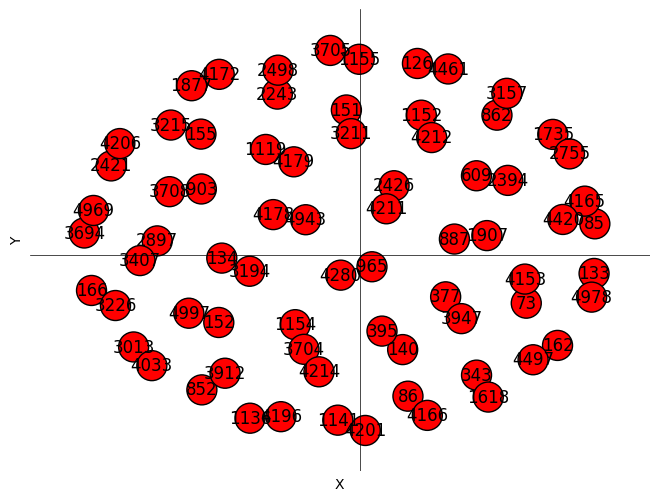

In [ ]:
crear_y_mostrar_grafo(pt1_distancias)

In [35]:
# Sitios importantes

sites = {
    "A2A_adenosine": [168, 169, 253, 277, 278],
    "A2A_G": [102, 110, 227, 231, 235],
    "beta2AR_epi1": [1113, 1114, 1117, 1193, 1203, 1207, 1289, 1290, 1293, 1312, 1316], # datos de PDB. El indexado de los sitios no coincide con la distribución real de los mismos.
    "beta2AR_epi2": [109, 110, 113, 114, 117, 192, 193, 203, 204, 207, 289, 290, 293, 308, 309, 312],
    "beta2AR_epi3": [262, 263, 266, 342, 352, 356, 410, 411, 414, 433, 437], # sitios de unión de ligandos con numeración real.
    "beta2AR_G": [131, 134, 135, 136, 138, 139, 142, 222, 226, 229, 233, 236, 239, 271, 274] # solo tomamos los valores superiores a 0.5 (en PDB se recogen los valores).
    }

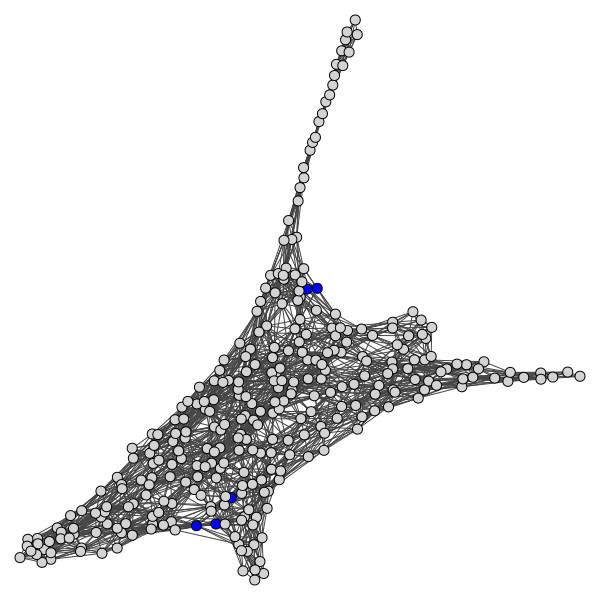

In [48]:
# Versión más nueva: usando CKDTree para calcular distancias y graficar el grafo.
from Bio.PDB import PDBParser
from scipy.spatial import cKDTree
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

pdb_id = "2ydo"

parser = PDBParser(QUIET=True)
structure = parser.get_structure(f"{pdb_id}", f"pdb{pdb_id}.pdb")

# Extracción de los CA en una lista

CA_coord = []
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                if atom.get_name() == "CA":
                   CA_coord.append(atom.get_coord())

# Generación del árbol (cKDTree) y generación de pares de átomos

tree = cKDTree(CA_coord)
atom_pairs = tree.query_pairs(r=10)

# Generación del grafo

g = ig.Graph()
g.add_vertices(CA_coord)
g.add_edges(atom_pairs)
layout = g.layout_fruchterman_reingold()
g.vs["size"] = 10
g.vs["color"] = ["lightgray"]

for aa in sites["A2A_adenosine"]:
    if 0 <= aa < len(g.vs): # Change here: Check if 'aa' is a valid vertex index
        g.vs[aa]["color"] = "blue"

igraph.plot(g, layout=layout)